In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 25.3 MB/s eta 0:00:0000:01


# Train Model


🔹 Các tham số quan trọng khi huấn luyện YOLO

1️⃣ Chọn kích thước mô hình (model)

Mô hình nhỏ (yolo11n.pt, yolo11s.pt) → Chạy nhanh hơn, nhưng độ chính xác thấp hơn.
Mô hình lớn (yolo11m.pt, yolo11l.pt, yolo11xl.pt) → Chính xác cao hơn, nhưng chạy chậm hơn.
==>Nên dùng với yolo nhỏ yolo11s.pt (cân bằng giữa tốc độ & độ chính xác).

2️⃣ Số lượng epochs (epochs)
Dưới 200 ảnh → Bắt đầu với 60 epochs.
Trên 200 ảnh → Bắt đầu với 40 epochs.
Lưu ý: Epochs quá cao có thể gây overfitting.

3️⃣ Độ phân giải ảnh (imgsz)
640x640 (mặc định) → Cân bằng giữa tốc độ & độ chính xác.
480x480 → Nhanh hơn, nhưng độ chính xác giảm.
==> test nhiều độ phân giải để test hiệu xuất

## 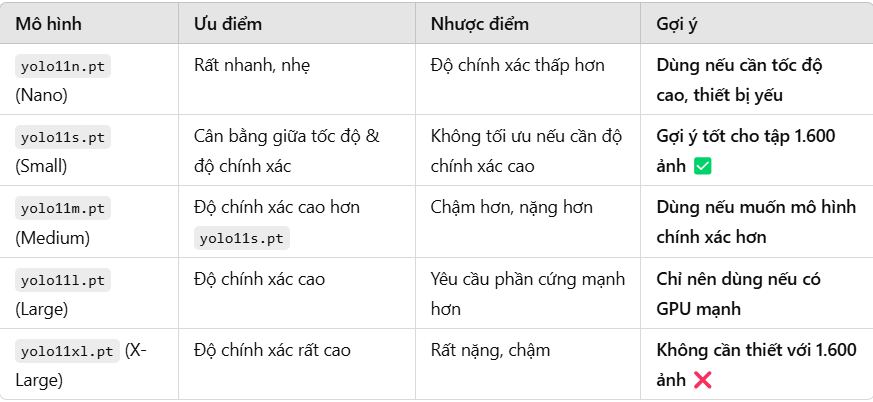

 
+ 📌 Mô hình phù hợp nhất: yolo11s.pt hoặc yolo11m.pt
+ 📌 Số epochs: 40 - 50 epochs (nhiều hơn có thể gây overfitting)
+ 📌 Kích thước ảnh: 640x640 (giữ nguyên để có độ chính xác tốt)

# Bắt đầu huấn luyện mô hình YOLO

Lưu ý :
+ 👉 Nếu cần tốc độ: Dùng yolo11s.pt
+ 👉 Nếu cần độ chính xác hơn: Dùng yolo11m.pt

In [10]:
!yolo detect train data=/kaggle/input/garbage-yolo11-12/data/yolov11/data.yaml model=yolo11s.pt epochs=50 imgsz=640

Ultralytics 8.3.88 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/input/garbage-yolo11-12/data/yolov11/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

## TEST

Kiểm tra xem nó hoạt động :bằng cách chạy trên các ảnh trong thư mục validation.
Kết quả mong đợi:
Mô hình sẽ vẽ hộp (bounding box) quanh từng đối tượng trong ảnh.
Lưu ý :Nếu mô hình không nhận diện tốt,fix với cách này nha :
+ Kiểm tra lại dữ liệu (tránh lỗi gán nhãn sai).
+ Tăng số epochs khi huấn luyện.
+ Dùng mô hình lớn hơn (ví dụ: yolo11l.pt).
+ Bổ sung thêm ảnh vào tập dữ liệu huấn luyện.

In [14]:
!yolo detect predict model=/kaggle/working/runs/detect/train2/weights/best.pt source=/kaggle/input/garbage-yolo11-12/data/yolov11/valid/images save=True

Ultralytics 8.3.88 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs

image 1/297 /kaggle/input/garbage-yolo11-12/data/yolov11/valid/images/0000_jpg.rf.ea1b7b59ceb803ee1d2ccc0eb493a00e.jpg: 640x640 1 giay, 9.5ms
image 2/297 /kaggle/input/garbage-yolo11-12/data/yolov11/valid/images/0009_jpg.rf.e4f877a2e6cce5b8021fbc04c702e5d2.jpg: 640x640 1 chai, 9.2ms
image 3/297 /kaggle/input/garbage-yolo11-12/data/yolov11/valid/images/0012_jpg.rf.dafa8fe48aa572be6e249e829666d0a9.jpg: 640x640 1 chai, 9.0ms
image 4/297 /kaggle/input/garbage-yolo11-12/data/yolov11/valid/images/0020_jpg.rf.793e241af304066c4f97335c4e31cd70.jpg: 640x640 1 chai, 9.0ms
image 5/297 /kaggle/input/garbage-yolo11-12/data/yolov11/valid/images/0024_jpg.rf.2c56f225845bc0d53048b7797a1ec8a0.jpg: 640x640 1 chai, 9.1ms
image 6/297 /kaggle/input/garbage-yolo11-12/data/yolov11/valid/images/0036_jpg.rf.f77e5a0989846a534c67c9a1bf992

## result

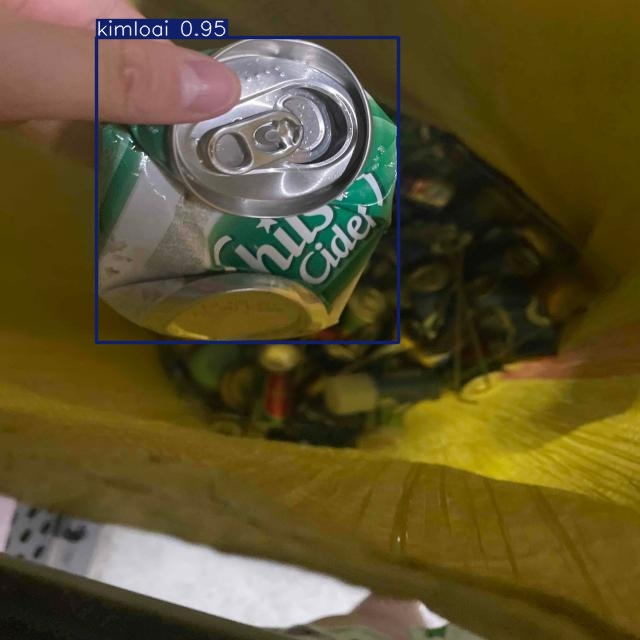

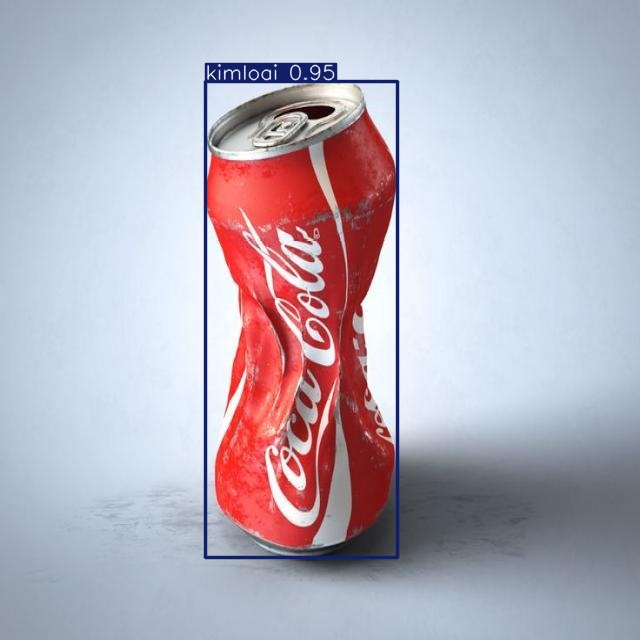

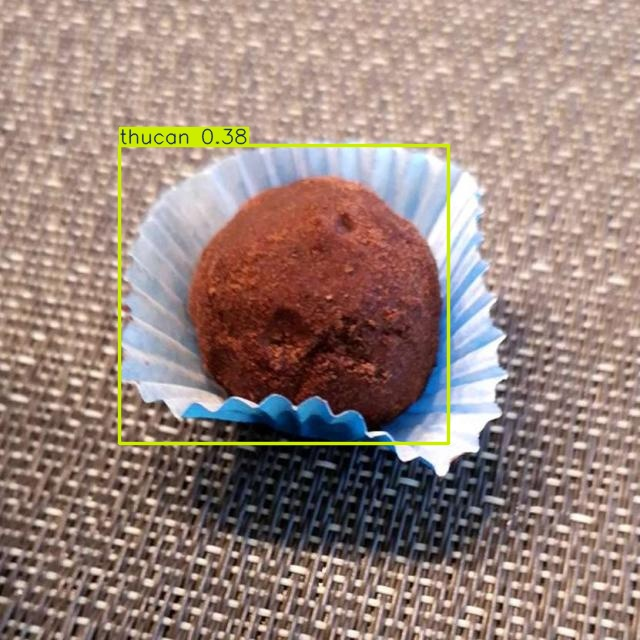

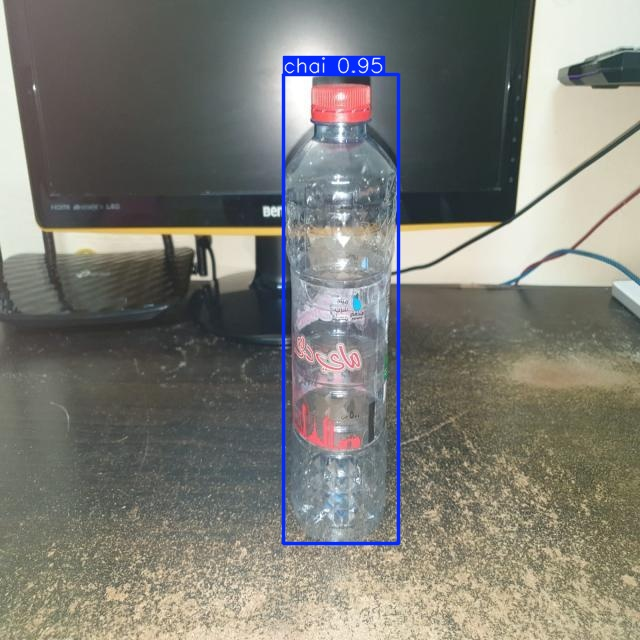

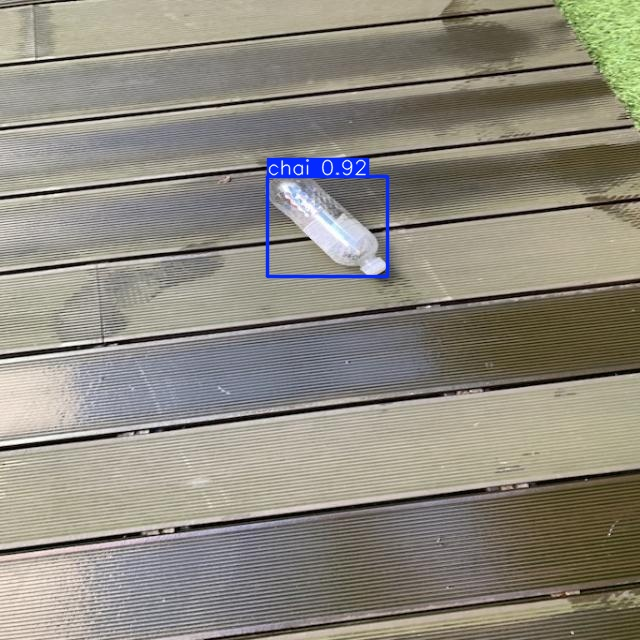

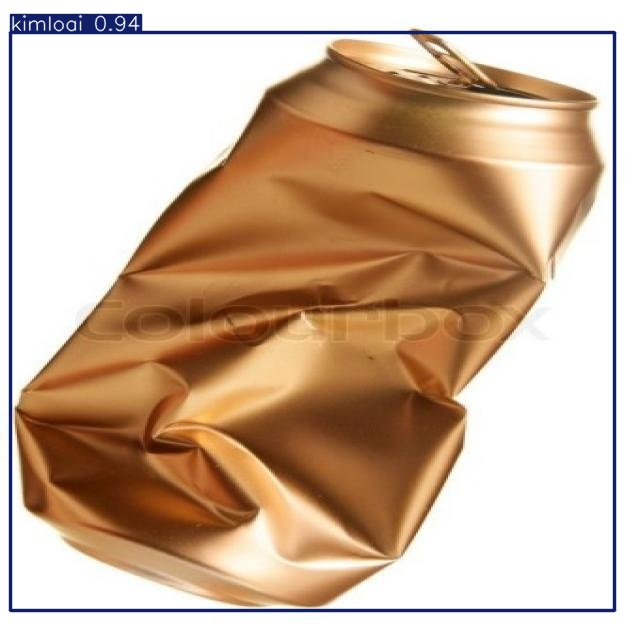

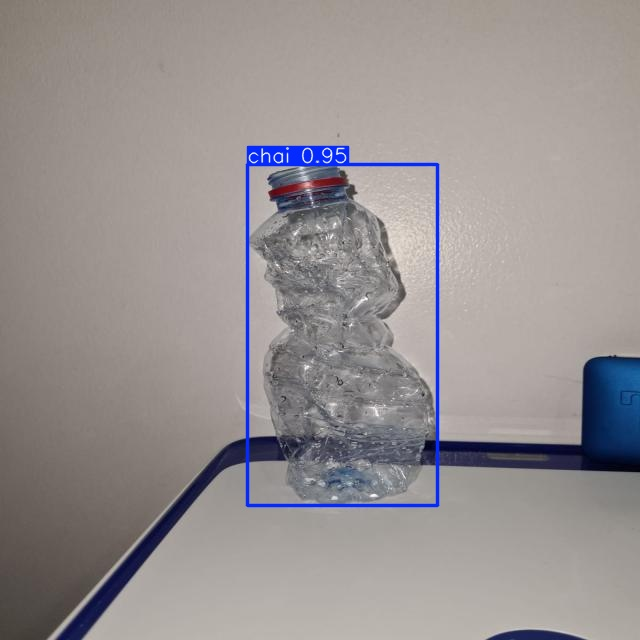

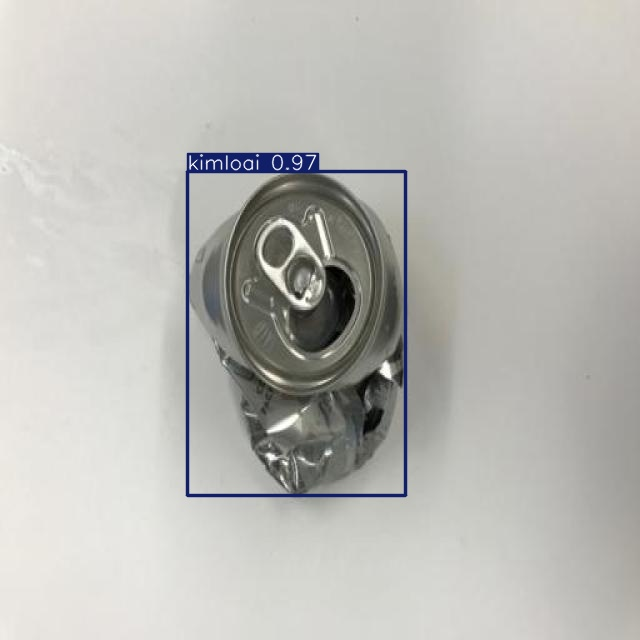

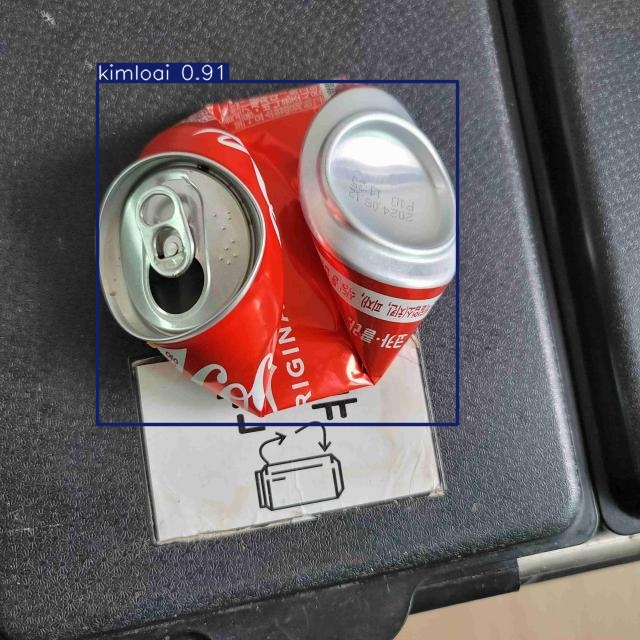

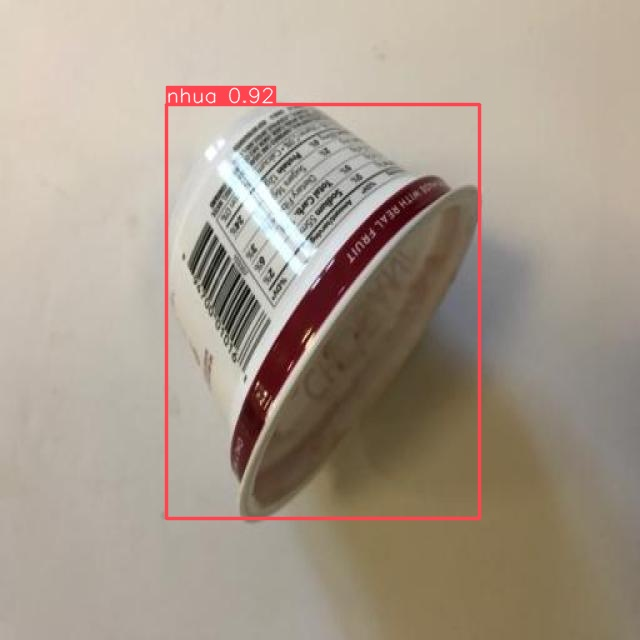

In [15]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

## CÓ THỂ RUN VỚI GPU MẠNH HƠN VỚI VIDEO 4K ĐỂ TEST HIỆU NĂNG

# Deploy Model

## Đang test PC và Raspberry Pi. 

# Download YOLO Model

In [17]:
# Tạo thư mục để lưu mô hình
!mkdir /kaggle/working/my_model

# Sao chép trọng số mô hình vào thư mục
!cp /kaggle/working/yolo11n.pt /kaggle/working/my_model/yolo11n.pt
!cp /kaggle/working/yolo11s.pt /kaggle/working/my_model/yolo11s.pt

# Sao chép toàn bộ thư mục runs (chứa kết quả huấn luyện)
!cp -r /kaggle/working/runs /kaggle/working/my_model/

# Chuyển vào thư mục my_model
!cd /kaggle/working/my_model

# Nén trọng số mô hình và thư mục runs thành tệp zip
!zip /kaggle/working/my_model.zip yolo11n.pt yolo11s.pt
!zip -r /kaggle/working/my_model.zip runs

# Quay lại thư mục gốc
!cd /kaggle/working


  adding: yolo11n.pt (deflated 11%)
  adding: yolo11s.pt (deflated 8%)
  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/img-2126-_jpg.rf.21ff07ae26ad9e00569dc87406461238.jpg (deflated 4%)
  adding: runs/detect/predict/crushed_can_-271-_jpg.rf.57984db825f8207dd0d4295c63fd8187.jpg (deflated 8%)
  adding: runs/detect/predict/067689_jpg.rf.64c218b9b2838665ab089bd801ccef01.jpg (deflated 4%)
  adding: runs/detect/predict/WhatsApp-Image-2022-01-27-at-4-47-42-PM-2-_jpeg_jpg.rf.9e5b46a2148f5052e5df2aec5768c036.jpg (deflated 5%)
  adding: runs/detect/predict/PET1-027_jpg.rf.48dfd2453d411aa197b572b0ad1728f7.jpg (deflated 8%)
  adding: runs/detect/predict/220-2-_jpg.rf.1c0075045abb48db6e4e3e6e0e18809d.jpg (deflated 17%)
  adding: runs/detect/predict/n599_jpg.rf.8afe4ac4929c177f1f400f12c43401b1.jpg (deflated 10%)
  adding: runs/detect/predict/trash-item-776-_jpg.rf.38030f69e28164998f4bbcc97fddb3eb.jpg (deflated 1

#  Deploy YOLO Model on Local Devices

In [ ]:
# set up  Anaconda với môi trường cần thiết
conda create --name yolo-env1 python=3.12 -y
conda activate yolo-env1
pip install ultralytics
pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [ ]:
#chạy với yolo_detect.py

In [ ]:
#độ phân giải cần thiết cho camera là 1280x720
python yolo_detect.py --model my_model.pt --source usb0 --resolution 1280x720
#my_model.pt tên model 
#source usb0 sử dụng usb camera

## Test model trên ảnh và video hoặc thư mực 

In [ ]:
#one image
!python yolo_detect.py --model my_model.pt --source image.jpg

In [ ]:
!python yolo_detect.py --model my_model.pt --source video.mp4

In [ ]:
!python yolo_detect.py --model my_model.pt --source path/to/images/

+ các tham số hỗ trợ 
+ --model	Chỉ định file mô hình (.pt) đang nâng cấp đến các model nâng cao nhẹ và nhanh chuẩn
+ --source	Ảnh, video, webcam hoặc thư mục ảnh
+ --thresh	Ngưỡng confidence tối thiểu (mặc định: 0.5)
+ --resolution	Độ phân giải hiển thị (mặc định: giữ nguyên) or --resolution 1280x720
+ --record	Ghi lại video kết quả (cần chỉ định --resolution) tùy chỉnh và có thể set up --record demo1.avi --resolution 1280x720